# **BURNOUT- A MotoGP Datathon**

---

Data analyzed by Team "AZERTRONZ" <br>
Team members:<br>
JAYAM V <br>
NISHOK A <br>





Importing Datasets

In [27]:
#importing necessary libraries for data_preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#importing Dataframe such as Train, Validation and Test
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

Exploratory Data Analysis (EDA)

In [29]:
df.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,...,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,...,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,...,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,...,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,...,22,31,175,146,132,29,17,2011,2021,11


In [30]:
df.dtypes

,0
Unique ID,int64
Rider_ID,int64
category_x,object
Circuit_Length_km,float64
Laps,int64
Grid_Position,int64
Avg_Speed_kmh,float64
Track_Condition,object
Humidity_%,int64
Tire_Compound_Front,object


In [31]:
df.describe()

,Unique ID,Rider_ID,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Humidity_%,Championship_Points,Championship_Position,year_x,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
count,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,...,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06
mean,1.367777e+06,5.509394e+03,4.701208e+00,2.150189e+01,1.149819e+01,2.496328e+02,5.951643e+01,1.744615e+02,1.254921e+01,1.997913e+03,...,2.190190e+01,2.973457e+01,1.012372e+02,8.746167e+01,7.096455e+01,1.399721e+01,7.374099e+00,1.993047e+03,2.002509e+03,9.377671e+00
std,7.890630e+05,2.597186e+03,6.910968e-01,2.293772e+00,6.334418e+00,5.773525e+01,1.733707e+01,1.009485e+02,6.913828e+00,1.708566e+01,...,5.928275e+00,1.162753e+01,8.143524e+01,6.986620e+01,6.685675e+01,2.615523e+01,1.641622e+01,1.683261e+01,1.747976e+01,5.144729e+00
min,0.000000e+00,1.000000e+03,3.500000e+00,1.800000e+01,1.000000e+00,1.500000e+02,3.000000e+01,0.000000e+00,1.000000e+00,1.949000e+03,...,1.200000e+01,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.949000e+03,1.949000e+03,1.000000e+00
25%,6.847348e+05,3.258000e+03,4.104000e+00,1.900000e+01,6.000000e+00,1.993500e+02,4.400000e+01,8.700000e+01,7.000000e+00,1.987000e+03,...,1.700000e+01,2.100000e+01,3.500000e+01,3.100000e+01,1.700000e+01,0.000000e+00,0.000000e+00,1.983000e+03,1.991000e+03,5.000000e+00
50%,1.368276e+06,5.514000e+03,4.702000e+00,2.200000e+01,1.200000e+01,2.496500e+02,6.000000e+01,1.740000e+02,1.300000e+01,2.001000e+03,...,2.100000e+01,2.900000e+01,8.500000e+01,7.400000e+01,5.300000e+01,4.000000e+00,1.000000e+00,1.996000e+03,2.007000e+03,9.000000e+00
75%,2.050815e+06,7.760000e+03,5.299000e+00,2.400000e+01,1.700000e+01,2.994600e+02,7.500000e+01,2.620000e+02,1.900000e+01,2.012000e+03,...,2.600000e+01,4.000000e+01,1.460000e+02,1.230000e+02,1.060000e+02,1.600000e+01,7.000000e+00,2.006000e+03,2.019000e+03,1.200000e+01
max,2.734366e+06,9.998000e+03,5.900000e+00,2.500000e+01,2.200000e+01,3.500000e+02,8.900000e+01,3.490000e+02,2.400000e+01,2.021000e+03,...,3.600000e+01,5.400000e+01,4.060000e+02,3.730000e+02,3.650000e+02,1.780000e+02,1.180000e+02,2.021000e+03,2.021000e+03,2.600000e+01


In [52]:
drop_cols = [
    'Unique_id','Rider_id', 'rider_name', 'team_name', 'bike_name',
    'shortname', 'points', 'position', 'rider', 'team', 'bike'
]

In [53]:
df.drop(columns=drop_cols, errors='ignore', inplace=True)

Correlation Matrix

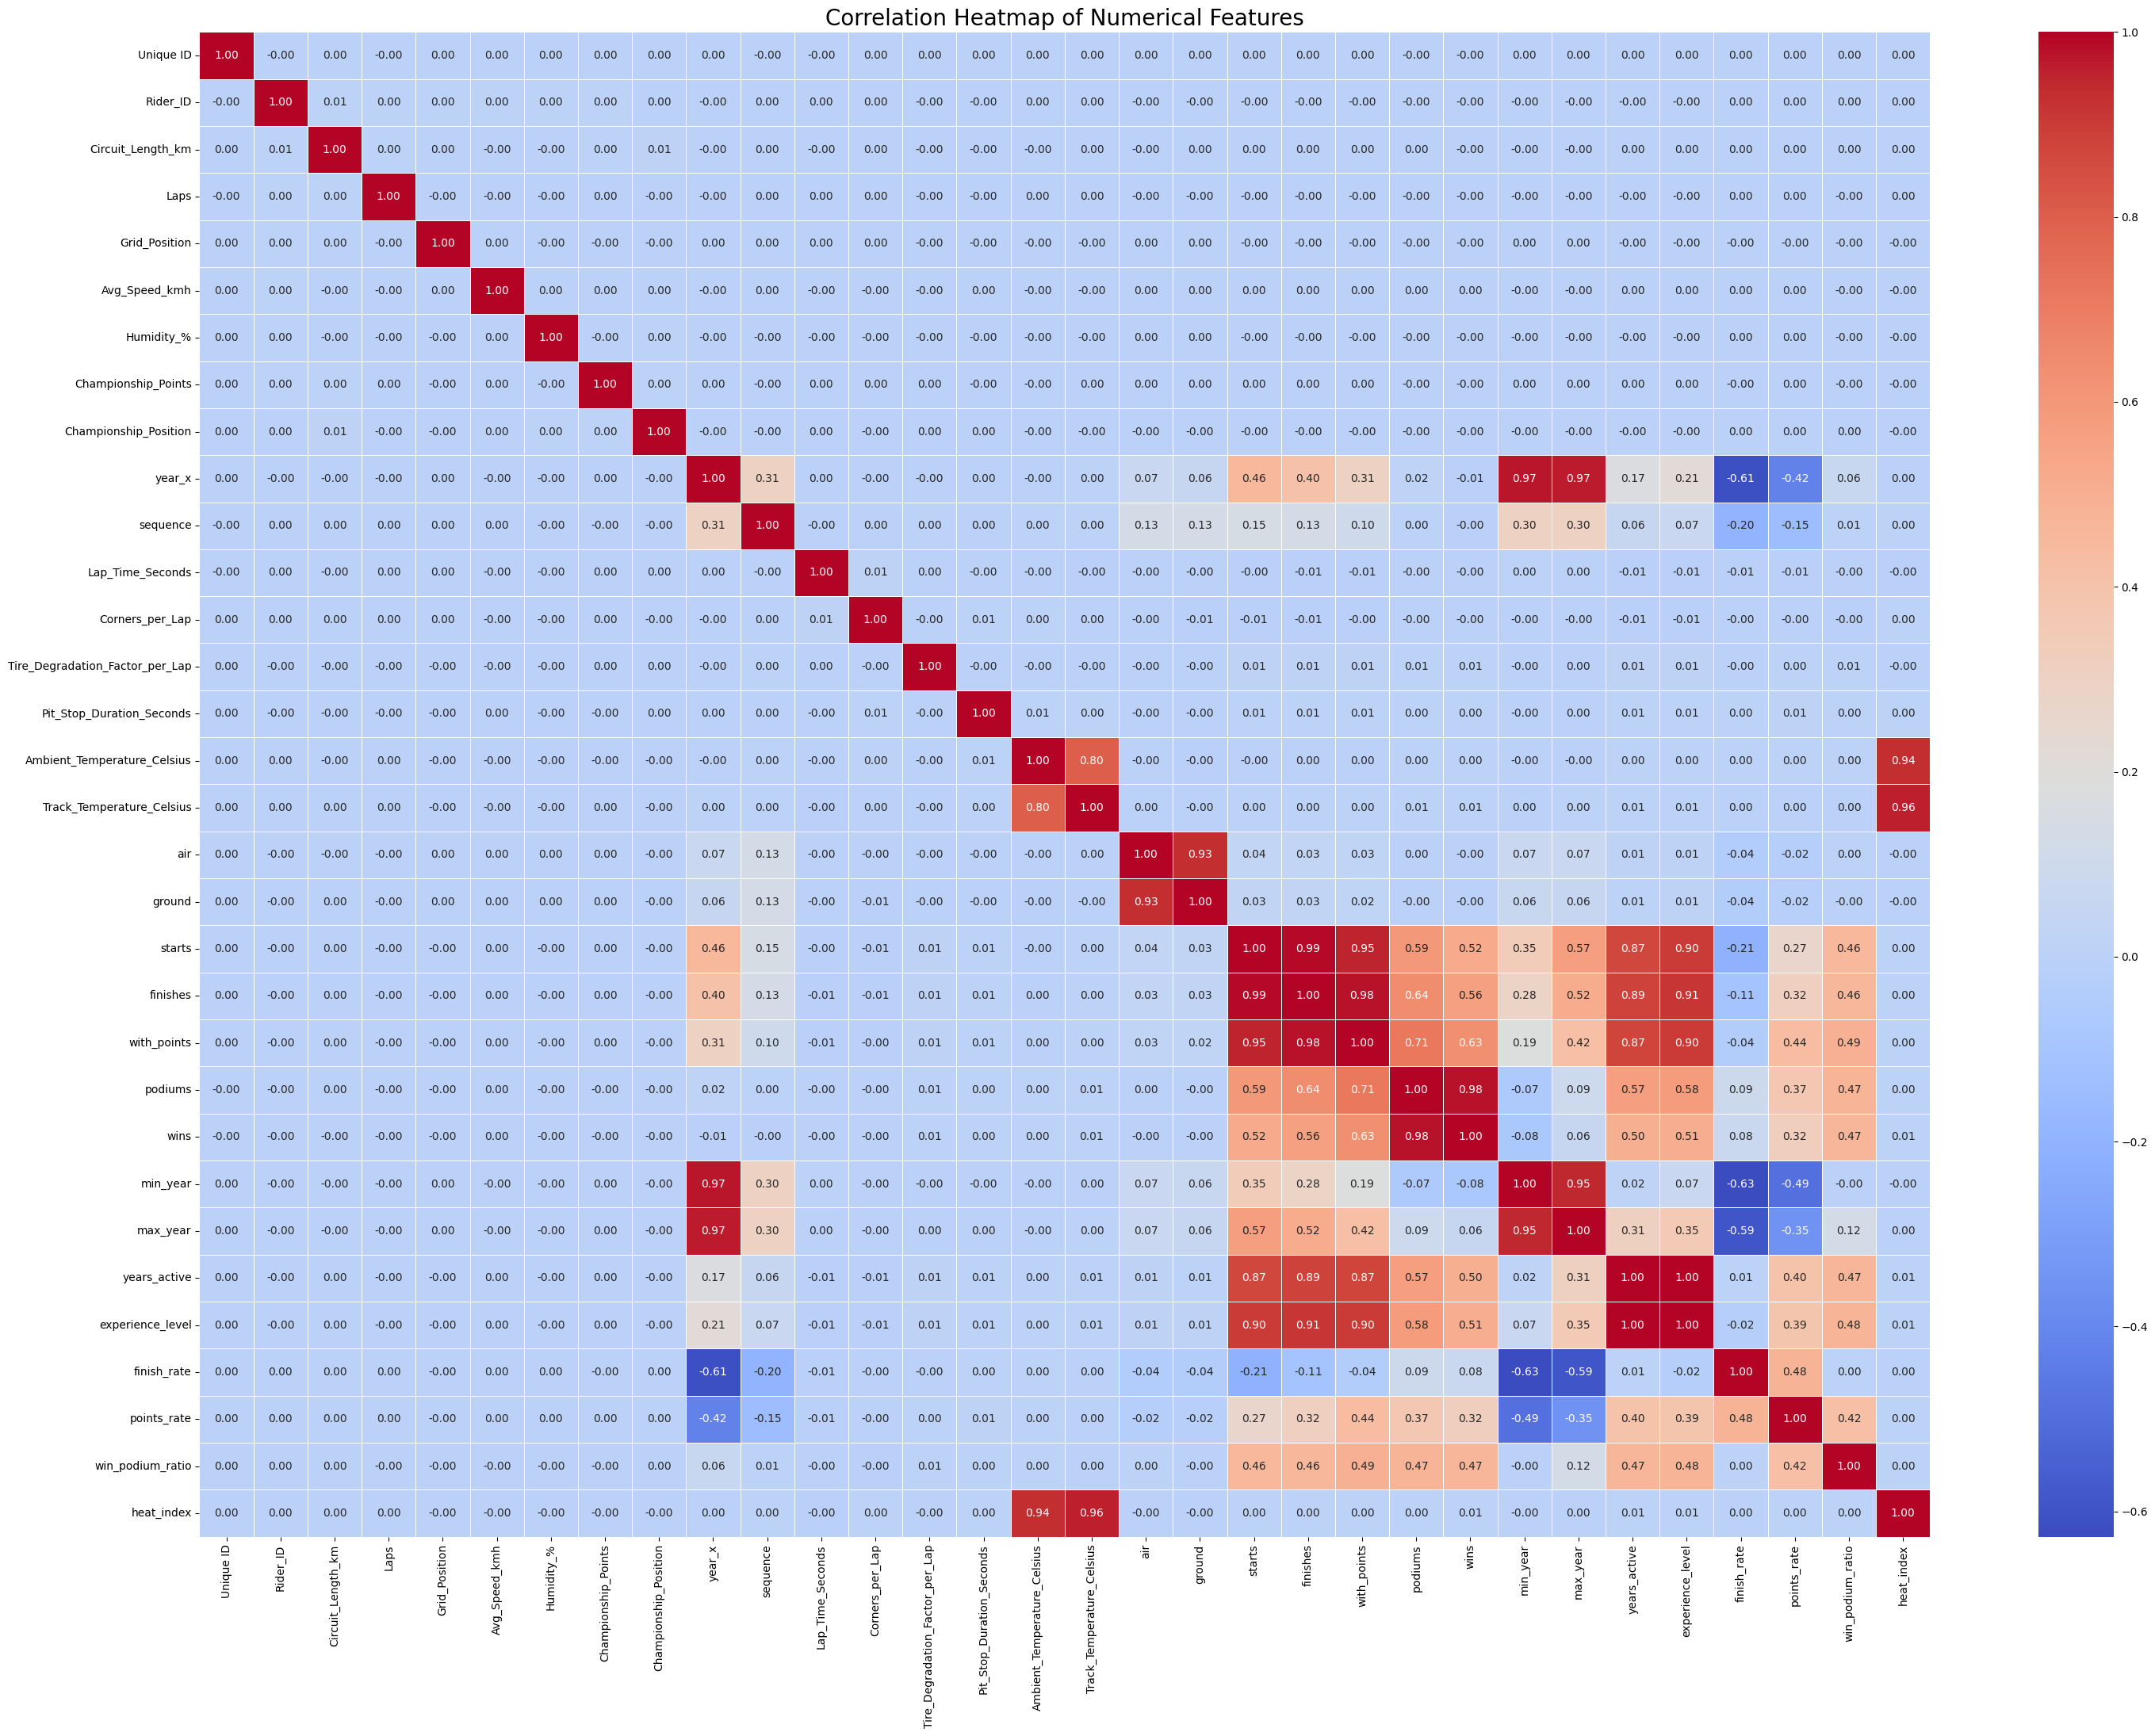

In [54]:
# Drop non-numeric and target-related columns
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

numeric_df['Lap_Time_Seconds'] = df['Lap_Time_Seconds']


# Set plot size
plt.figure(figsize=(30, 22))

# Draw heatmap
sns.heatmap(numeric_df.corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()

In [55]:
unique_columns=df.nunique()
print(unique_columns)

Unique ID                          1914056
Rider_ID                              8999
category_x                               3
Circuit_Length_km                     2401
Laps                                     8
Grid_Position                           22
Avg_Speed_kmh                        19961
Track_Condition                          2
Humidity_%                              60
Tire_Compound_Front                      3
Tire_Compound_Rear                       3
Penalty                                  5
Championship_Points                    350
Championship_Position                   24
Session                                  7
year_x                                  73
sequence                                19
circuit_name                            70
Lap_Time_Seconds                     30205
Corners_per_Lap                         16
Tire_Degradation_Factor_per_Lap         46
Pit_Stop_Duration_Seconds              301
Ambient_Temperature_Celsius            201
Track_Tempe

Feature Engineering

In [56]:
df['experience_level'] = df['years_active'] + (df['starts'] / 100)

df['finish_rate'] = df['finishes'] / df['starts']

df['points_rate'] = df['with_points'] / df['starts']

df['win_podium_ratio'] = df['wins'] / df['podiums']

df['win_podium_ratio'] = df['win_podium_ratio'].replace([np.inf, -np.inf], 0).fillna(0)

df['heat_index'] = (df['Ambient_Temperature_Celsius'] + df['Track_Temperature_Celsius']) / 2

df['tire_strategy'] = df['Tire_Compound_Front'].astype(str) + "_" + df['Tire_Compound_Rear'].astype(str)

df['weather_impact'] = np.where(
    (df['Track_Condition'] == 'Wet') | (df['weather'].str.lower().str.contains('rain', na=False)),
    'High', 'Low'
)

In [57]:
target = 'Lap_Time_Seconds'
y = df[target]

features = [
    'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'heat_index', 'experience_level', 'finish_rate', 'points_rate',
    'win_podium_ratio', 'category_x', 'Session', 'Track_Condition',
    'weather', 'tire_strategy', 'weather_impact'
]
X = df[features]

In [58]:
X.describe()

,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Ambient_Temperature_Celsius,Track_Temperature_Celsius,heat_index,experience_level,finish_rate,points_rate,win_podium_ratio
count,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06
mean,4.701208e+00,2.150189e+01,1.149819e+01,2.496328e+02,1.749956e+01,2.751516e-03,2.498259e+01,3.249059e+01,2.873659e+01,1.039004e+01,8.824079e-01,6.400063e-01,2.767975e-01
std,6.910968e-01,2.293772e+00,6.334418e+00,5.773525e+01,4.607237e+00,1.299112e-03,5.761291e+00,7.215789e+00,6.160716e+00,5.864620e+00,1.115826e-01,2.854161e-01,2.831136e-01
min,3.500000e+00,1.800000e+01,1.000000e+00,1.500000e+02,1.000000e+01,5.000000e-04,1.500000e+01,1.510000e+01,1.510000e+01,1.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.104000e+00,1.900000e+01,6.000000e+00,1.993500e+02,1.300000e+01,1.600000e-03,2.000000e+01,2.720000e+01,2.370000e+01,5.720000e+00,8.169014e-01,4.545455e-01,0.000000e+00
50%,4.702000e+00,2.200000e+01,1.200000e+01,2.496500e+02,1.800000e+01,2.800000e-03,2.490000e+01,3.240000e+01,2.875000e+01,9.770000e+00,9.062500e-01,6.916667e-01,2.727273e-01
75%,5.299000e+00,2.400000e+01,1.700000e+01,2.994600e+02,2.200000e+01,3.900000e-03,3.000000e+01,3.770000e+01,3.375000e+01,1.367000e+01,9.693878e-01,8.767123e-01,5.000000e-01
max,5.900000e+00,2.500000e+01,2.200000e+01,3.500000e+02,2.500000e+01,5.000000e-03,3.500000e+01,5.000000e+01,4.250000e+01,3.006000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [74]:
unique_columns=X.nunique()

data = {'Unique Count': unique_columns, 'Data Type': X.dtypes}
lis = pd.DataFrame(data)

print(lis)

                                 Unique Count Data Type
Circuit_Length_km                        2401   float64
Laps                                        8     int64
Grid_Position                              22     int64
Avg_Speed_kmh                           19961   float64
Corners_per_Lap                            16     int64
Tire_Degradation_Factor_per_Lap            46   float64
Ambient_Temperature_Celsius               201   float64
Track_Temperature_Celsius                 350   float64
heat_index                                823   float64
experience_level                          573   float64
finish_rate                               366   float64
points_rate                               486   float64
win_podium_ratio                          120   float64
category_x                                  3    object
Session                                     7    object
Track_Condition                             2    object
weather                                     5   

In [60]:
X["category_x"].unique()

array(['Moto2', 'Moto3', 'MotoGP'], dtype=object)

In [61]:
X["Session"].unique()

array(['FP3', 'Race', 'FP2', 'Qualifying', 'FP1', 'FP4', 'Sprint'],
      dtype=object)

In [62]:
X["Track_Condition"].unique()

array(['Wet', 'Dry'], dtype=object)

In [63]:
X["weather"].unique()

array(['Clear', 'Raining', 'Cloudy', 'Partly cloudy', 'Sunny'],
      dtype=object)

In [64]:
X["tire_strategy"].unique()

array(['Hard_Hard', 'Soft_Medium', 'Soft_Hard', 'Hard_Medium',
       'Medium_Medium', 'Soft_Soft', 'Medium_Soft', 'Hard_Soft',
       'Medium_Hard'], dtype=object)

In [65]:
X["weather_impact"].unique()

array(['High', 'Low'], dtype=object)

Encoding Categorical Data

In [66]:
# List of categorical columns to one-hot encode
categorical_cols = [
    'category_x', 'Session', 'Track_Condition',
    'weather', 'tire_strategy', 'weather_impact'
]

df_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("✅ One-hot encoding complete. Shape:", df_encoded.shape)

✅ One-hot encoding complete. Shape: (1914056, 35)


In [67]:
df_encoded.head()

,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Ambient_Temperature_Celsius,Track_Temperature_Celsius,heat_index,experience_level,...,weather_Sunny,tire_strategy_Hard_Medium,tire_strategy_Hard_Soft,tire_strategy_Medium_Hard,tire_strategy_Medium_Medium,tire_strategy_Medium_Soft,tire_strategy_Soft_Hard,tire_strategy_Soft_Medium,tire_strategy_Soft_Soft,weather_impact_Low
0,4.874,22,17,264.66,18,0.0042,23.0,27.3,25.15,4.53,...,False,False,False,False,False,False,False,False,False,False
1,3.875,24,7,177.56,23,0.0025,34.3,41.8,38.05,8.27,...,False,False,False,False,False,False,False,True,False,False
2,5.647,25,5,317.74,19,0.0044,20.6,27.1,23.85,8.45,...,False,False,False,False,False,False,True,False,False,True
3,4.810,19,3,321.82,12,0.0034,20.9,29.1,25.00,17.92,...,False,False,False,False,False,False,True,False,False,False
4,5.809,25,21,239.92,23,0.0017,29.1,43.4,36.25,12.75,...,False,True,False,False,False,False,False,False,False,False


Outlier Detection

In [68]:
outlier_percentages = {}
total_outliers = 0

# Select only numeric columns for outlier detection
numeric_cols = df_encoded.select_dtypes(include=['number']).columns

for feature in numeric_cols:
    Q1 = df_encoded[feature].quantile(0.25)
    Q3 = df_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_encoded[(df_encoded[feature] < lower_bound) | (df_encoded[feature] > upper_bound)]

    outlier_percentage = (len(outliers) / len(df_encoded)) * 100
    outlier_percentages[feature] = outlier_percentage

    total_outliers += len(outliers)

    # Print the details
    print(f'Feature: {feature}')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%\n')

print(f'Total number of outliers across all numeric features: {total_outliers}')

Feature: Circuit_Length_km
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Laps
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Grid_Position
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Avg_Speed_kmh
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Corners_per_Lap
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Tire_Degradation_Factor_per_Lap
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Ambient_Temperature_Celsius
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: Track_Temperature_Celsius
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: heat_index
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: experience_level
Number of outliers: 13950
Percentage of outliers: 0.73%

Feature: finish_rate
Number of outliers: 22805
Percentage of outliers: 1.19%

Feature: points_rate
Number of outliers: 0
Percentage of outliers: 0.00%

Feature: win_podium_ratio
Number of outlier

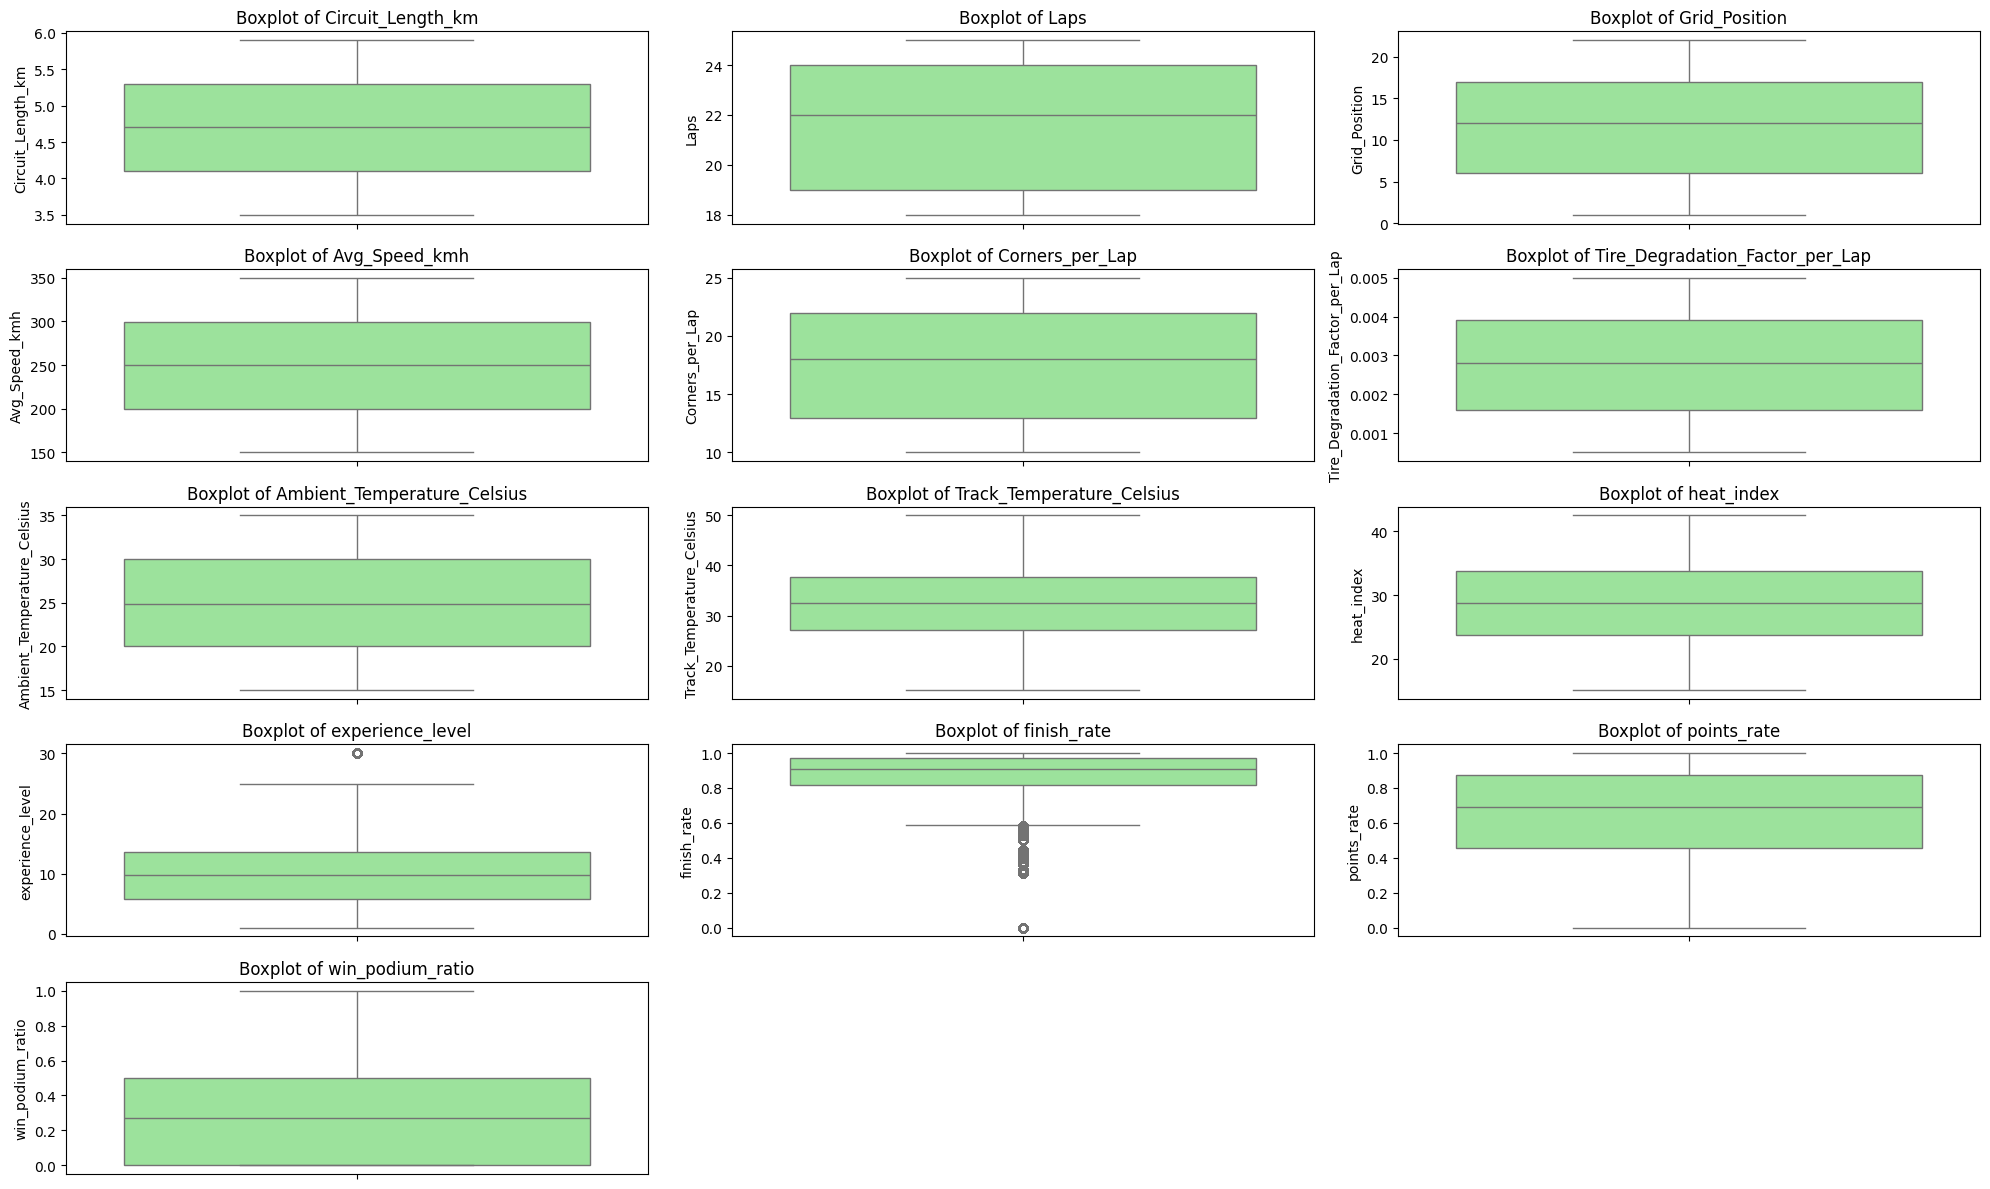

In [69]:
# Only select numeric columns from X for boxplot
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create box plots for numeric features
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) - 1) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df_encoded, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

Removing Outliers

In [70]:
def remove_iqr_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Combine X and y into one DataFrame
df_full = df_encoded.copy()
df_full['lap_time_seconds'] = y

# Remove outliers only from the two specified features
columns_to_filter = ['experience_level', 'finish_rate']
df_filtered = remove_iqr_outliers(df_full, columns_to_filter)

# Separate the cleaned dataset
X_clean = df_filtered.drop(columns=['lap_time_seconds'])
y_clean = df_filtered['lap_time_seconds']


In [71]:
X_clean.shape

(1877301, 35)

In [72]:
X_clean.dtypes

,0
Circuit_Length_km,float64
Laps,int64
Grid_Position,int64
Avg_Speed_kmh,float64
Corners_per_Lap,int64
Tire_Degradation_Factor_per_Lap,float64
Ambient_Temperature_Celsius,float64
Track_Temperature_Celsius,float64
heat_index,float64
experience_level,float64


Saving Dataset

In [73]:
# Save the processed dataframe of TRAIN,VALIDATION and TEST Dataset
X_clean.to_csv("/content/drive/MyDrive/train_data_set.csv", index=False)